### 목표
- 신경망을 활용해서 다중 분류에 필요한 keras의 기능을 활용해보자
- 이미지 데이터를 다루는 방법을 이해해보자
- 직접 손으로 쓴 글씨를 인식하는 것 까지 연결해보자 

In [61]:
# 환경 셋팅
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist

# 이미지 불러오기

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [62]:
# 크기 확인
print("훈련용 데이터 : ",X_train.shape, y_train.shape)
print("테스트용 데이터 : ",X_test.shape, y_test.shape)

훈련용 데이터 :  (60000, 28, 28) (60000,)
테스트용 데이터 :  (10000, 28, 28) (10000,)


0


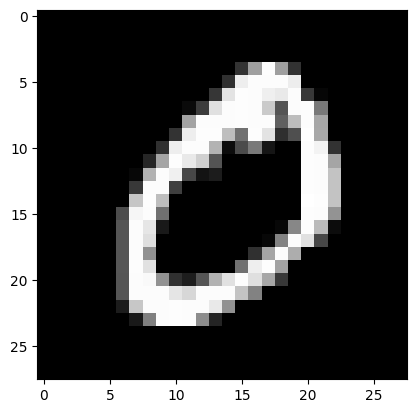

5


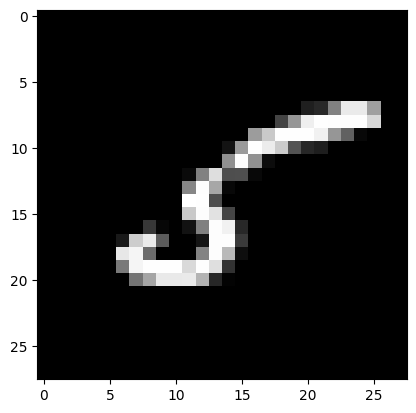

0


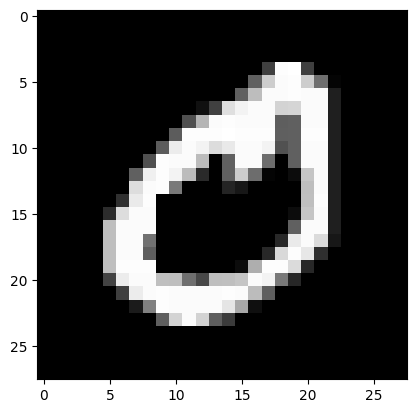

8


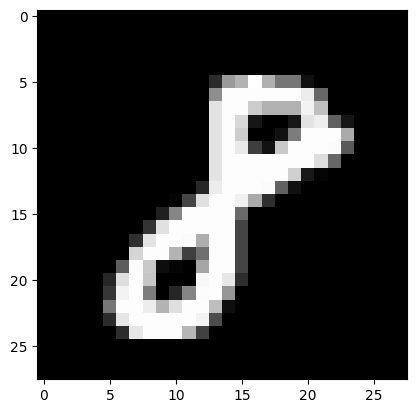

8


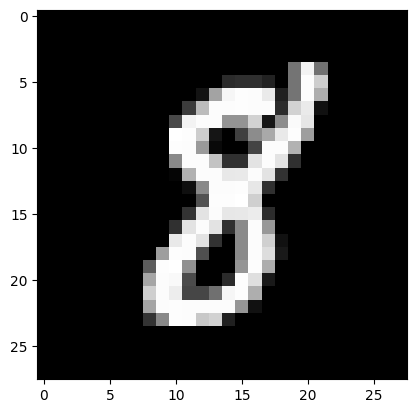

0


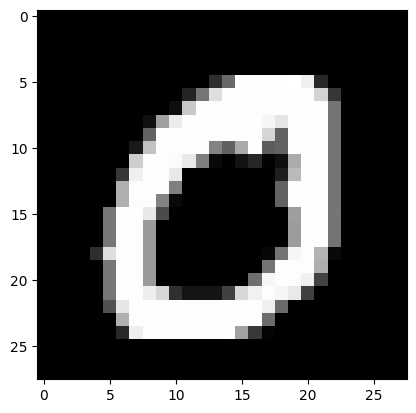

4


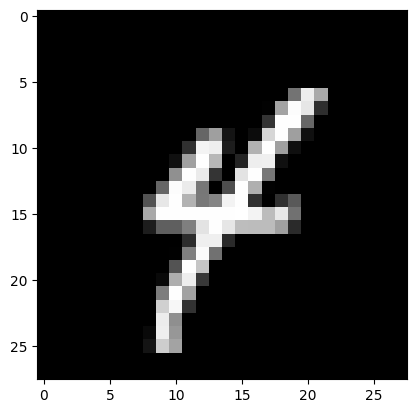

7


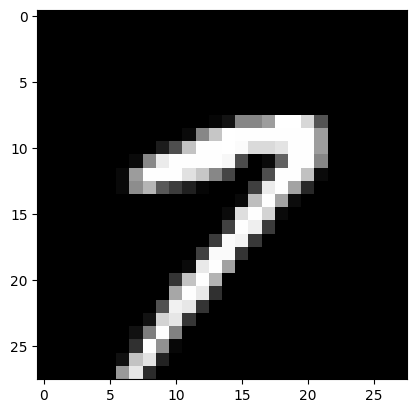

0


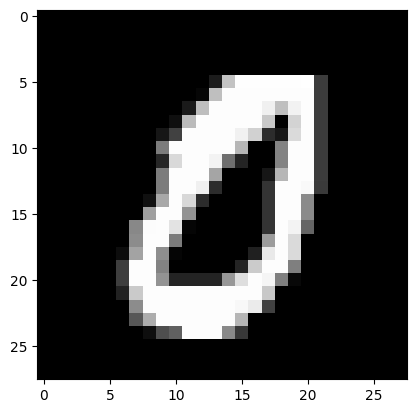

7


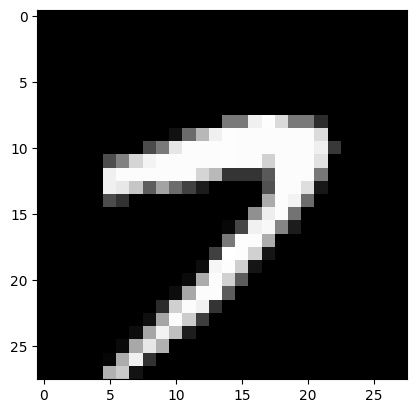

In [63]:
# 100번째 이미지 확인해보기
for i in range(1,100,10):
    plt.imshow(X_train[i],cmap='gray')
    print(y_train[i])
    plt.show()

In [64]:
# 이미지 크기 변경, 전처리
# mlp가 받아드리는 것은 1차원
# -> 1차원 변환

X_train2=X_train.reshape(60000,28*28)
X_test2 = X_test.reshape(10000,28*28)

# + 분산을 줄여주기도 한다.
# 이미지 흑~백 : 0 ~ 255
# 0 ~ 1 변형을 하기도 한다. 
# X_train2 / 255.0 나눠준다.

# 크기 확인
print(X_train2.shape)
print(X_test2.shape)

(60000, 784)
(10000, 784)


In [65]:
# 클래스 값 확인
# 10개
np.unique(y_train)
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [66]:
# 원핫 인코딩
from tensorflow.keras.utils import to_categorical # 라벨 인코딩이 된 상황

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print(y_train_oh.shape,y_test_oh.shape)

(60000, 10) (10000, 10)


In [67]:
y_train_oh[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### MLP 신경망 설계



In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [69]:
# add() : 신경망에 층을 추가
# Dense() : 층을 정의한다 (퍼셉트론의 수, 입력데이터의 수 , 활성화 함수)
# input_dim, input_shape : 
# 다차원 데이터를 입력으로 받거나, 1차원 데이터를 입력으로 받을 때 사용하는 키워드
# 특성의 수 - 픽셀의 수 => 이미지 데이터 크기 : 784(28*28)

model_mlp = Sequential()

# 입력 + 중간층 
model_mlp.add(Dense(units=600, input_dim=784, activation='relu'))

# 은닉층(중간층)
model_mlp.add(Dense(units=300, activation='relu'))
model_mlp.add(Dense(units=50, activation='relu'))

# 출력층
model_mlp.add(Dense(units=10, activation='softmax'))

model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 600)               471000    
                                                                 
 dense_9 (Dense)             (None, 300)               180300    
                                                                 
 dense_10 (Dense)            (None, 50)                15050     
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 666,860
Trainable params: 666,860
Non-trainable params: 0
_________________________________________________________________


In [70]:
# 학습 / 평가 방법 설정
# 설계한 신경망 모델을 학습이 가능한 형태로 변경 -> compile
# loss : 손실함수
# - 회귀 : mse 또는 mean_squared_error
# - 이진분류 : binary_crossentropy
# - 다중분류 : categorical_crossentropy
# optimizer : 최적화 함수 (w,b 갱신하는 것)
# sgd, rmsprop, adam
# metrics : 평가 방법
# - 분류 : 정확도(accuracy)
# - 회귀 : 생략 -> loss 성능 인식

model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [71]:
# 검증용 데이터 생성
# 7:3
# 랜덤 고정 3
from sklearn.model_selection import train_test_split

X_train2, X_val, y_train_oh2, y_val = train_test_split(X_train2, y_train_oh, test_size=0.3, random_state=3)
print('훈련크기:', X_train2.shape, y_train_oh2.shape)
print("검증크기:", X_val.shape, y_val.shape)

훈련크기: (42000, 784) (42000, 10)
검증크기: (18000, 784) (18000, 10)


In [73]:
# 학습
# fit
# 데이터 분리  
# 검증용 데이터 연결
# 반복 50
# 배치 사이즈 = 256
h1 = model_mlp.fit(X_train2, y_train_oh2, validation_data=(X_val, y_val), epochs = 50,batch_size=256)

Epoch 1/50
165/165 [==============================] - 7s 7ms/step - loss: 2.5529 - accuracy: 0.7226 - val_loss: 0.6698 - val_accuracy: 0.8386
Epoch 2/50
165/165 [==============================] - 1s 5ms/step - loss: 0.4458 - accuracy: 0.8914 - val_loss: 0.4168 - val_accuracy: 0.9085
Epoch 3/50
165/165 [==============================] - 1s 4ms/step - loss: 0.2891 - accuracy: 0.9284 - val_loss: 0.3248 - val_accuracy: 0.9263
Epoch 4/50
165/165 [==============================] - 1s 4ms/step - loss: 0.2748 - accuracy: 0.9289 - val_loss: 0.3031 - val_accuracy: 0.9412
Epoch 5/50
165/165 [==============================] - 1s 4ms/step - loss: 0.1659 - accuracy: 0.9555 - val_loss: 0.2524 - val_accuracy: 0.9491
Epoch 6/50
165/165 [==============================] - 1s 4ms/step - loss: 0.1465 - accuracy: 0.9623 - val_loss: 0.2443 - val_accuracy: 0.9522
Epoch 7/50
165/165 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.9716 - val_loss: 0.2460 - val_accuracy: 0.9568
Epoch 

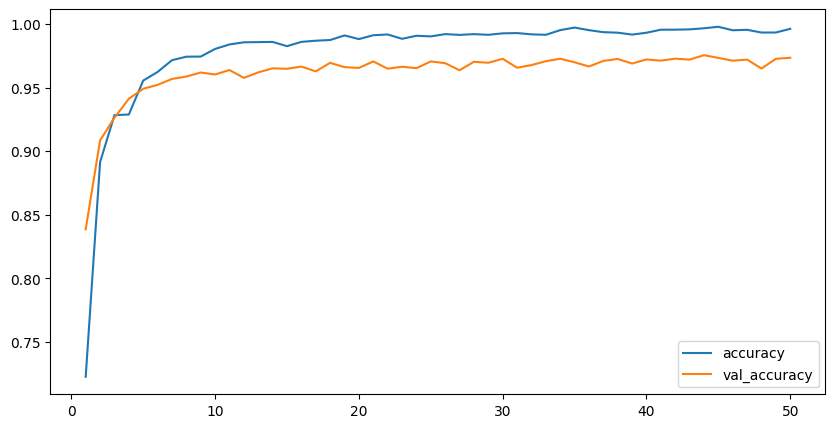

In [81]:
# 학습 현황 시각화 해보기
plt.figure(figsize=(10,5))
plt.plot(range(1,51), h1.history['accuracy'], label='accuracy')
plt.plot(range(1,51), h1.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [100]:
# 예측
# 1번째 이미지 예측하게 하기
# 학습된 이미지의 크기에 맞춰서 데이터 연결

pred = model_mlp.predict(X_test2[1:2])
print(pred)
print("예측한 숫자:",pred.argmax())
print("실제 답 라벨 : ",y_test[1])

1/1 [==============================] - 0s 20ms/step
[[3.2793565e-18 4.6886334e-19 1.0000000e+00 5.8164973e-19 1.8298520e-33
  3.8639812e-26 3.3526222e-24 6.9146005e-16 3.9887657e-19 2.3229147e-23]]
예측한 숫자: 2
실제 답 라벨 :  2


#### 직접 쓴 숫자를 인식시켜보자
- gradio 실시간으로 서버와 모델을 연동하는 모듈(streamlit도 많이 활용)
- 편리한 인터페이스를 제공하기 때문에 활용해보자

In [101]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [110]:
import gradio as gr
def recognition(img):
    img = img.reshape(-1,784)
    pred = model_mlp.predict(img)
    result = pred.argmax()
    return f'{result}'


gr.Interface(fn = recognition, inputs = gr.Sketchpad(brush_radius=0.5),outputs='label').launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

#### CNN 모델 설계

In [114]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D ,InputLayer, Flatten

In [118]:
# CNN + MLP => CNN 모델

# MLP : 위치에 민감, 숫자의 크기에 민감
# CNN : 이미지 안에 중요부위만 추출해서 학습에 적용하게 하는 기능
# 위치에 덜 민감해짐, 크기에 덜 민감해짐 -> 예측 정확도, 성능이 올라감

# 신경망 생성
model_cnn = Sequential() # 뼈대 구축

# 입력층
# 2차원 데이터 입력 받음 => CNN
# 행, 열, 색감 정보(흑백 :1, rgb컬러 : 3)
# X_train, y_train_oh
model_cnn.add(InputLayer(input_shape=(28,28,1)))

# cnn층 -> 특성 추출 부
# 커널, 필터 = 32개 설정 => 주요 부분을 출력하기 위한 연산작용 연결
model_cnn.add(Conv2D(32, kernel_size=(4,4), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(64, kernel_size=(4,4), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

# MLP층(전결함층, 완전연결층) 연결 - 예측부
model_cnn.add(Flatten())

# cnn을 거치고 나서 mlp층은 중간층을 얕게 쌓는 특징이 있다.

model_cnn.add(Dense(128, activation='relu'))

# 출력층
model_cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 구조 확인
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [119]:
# 학습 / 평가 방법 설정

model_cnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])



In [121]:
# 학습
h2 = model_cnn.fit(X_train,y_train_oh, validation_split=0.3, batch_size=256, epochs=50)

Epoch 1/50
165/165 [==============================] - 2s 11ms/step - loss: 0.0683 - accuracy: 0.9796 - val_loss: 0.0571 - val_accuracy: 0.9824
Epoch 2/50
165/165 [==============================] - 2s 10ms/step - loss: 0.0422 - accuracy: 0.9875 - val_loss: 0.0531 - val_accuracy: 0.9828
Epoch 3/50
165/165 [==============================] - 1s 9ms/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 4/50
165/165 [==============================] - 1s 9ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0456 - val_accuracy: 0.9861
Epoch 5/50
165/165 [==============================] - 2s 9ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.0447 - val_accuracy: 0.9859
Epoch 6/50
165/165 [==============================] - 1s 9ms/step - loss: 0.0105 - accuracy: 0.9974 - val_loss: 0.0444 - val_accuracy: 0.9868
Epoch 7/50
165/165 [==============================] - 2s 10ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0451 - val_accuracy: 0.9876
Epo

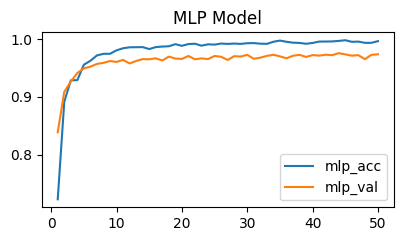

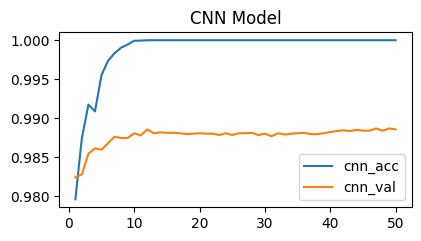

In [138]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(range(1,51), h1.history['accuracy'], label = 'mlp_acc') 
plt.plot(range(1,51), h1.history['val_accuracy'], label = 'mlp_val')
plt.title("MLP Model")
plt.legend()

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
plt.plot(range(1,51), h2.history['accuracy'], label = 'cnn_acc') 
plt.plot(range(1,51), h2.history['val_accuracy'], label = 'cnn_val')
plt.title("CNN Model")
plt.legend()
plt.show()

In [140]:
import gradio as gr
def recognition(img):
    img = img.reshape((1,28,28))
    pred = model_cnn.predict(img)
    result = pred.argmax()
    return f'{result}'


gr.Interface(fn = recognition, inputs = gr.Sketchpad(brush_radius=0.5),outputs='label').launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>